In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [32]:
ged_spatial = np.load('ged_spatial.npy', allow_pickle=True)
ged_spatial_PE = np.load('ged_spatial_PE.npy', allow_pickle=True)

In [38]:
ged_norm_spatial = np.load('ged_norm_spatial.pkl', allow_pickle=True)
ged_norm_spatial_PE = np.load('ged_norm_spatial_PE.npy', allow_pickle=True)

In [42]:
len(ged_norm_spatial)

10

In [39]:
np.mean(ged_norm_spatial,axis=1)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (10,) + inhomogeneous part.

In [45]:
np.mean(ged_norm_spatial_PE)

0.8337886908656904

In [43]:
ged_norm_spatial_benchmark = np.load('ged_norm_spatial_benchmark.npy', allow_pickle=True)
np.mean(ged_norm_spatial_benchmark,axis=1)

array([0.68115668, 0.79651199, 0.75327181, 0.70527842, 0.66311225])

In [33]:
ged_spatial_benchmark = np.load('ged_spatial_benchmark.npy', allow_pickle=True)
np.mean(ged_spatial_benchmark,axis=1)

array([147.82, 291.18, 242.11, 198.16, 171.61])

In [6]:
ged_modular_benchmark = np.load('ged_modular_benchmark.npy', allow_pickle=True)
np.mean(ged_modular_benchmark,axis=1)

array([ 489.32, 1010.6 , 1543.71, 2094.11])

In [7]:
ged_lattice_benchmark = np.load('ged_lattice_benchmark.npy', allow_pickle=True)
np.mean(ged_lattice_benchmark,axis=1)

array([ 250.94,  573.88,  993.68, 1528.54])

In [11]:
ged_spatial_subset = ged_spatial[:, [1,3,5,7]]

In [7]:
np.shape(ged_spatial)

(10, 100)

In [13]:
means_group1

array([150.5 , 167.25, 179.  , 209.5 , 224.75, 238.5 , 220.  , 307.5 ,
       329.5 , 352.5 ])

In [19]:
np.shape(ged_spatial[[1,3,5,7],:])

(4, 100)

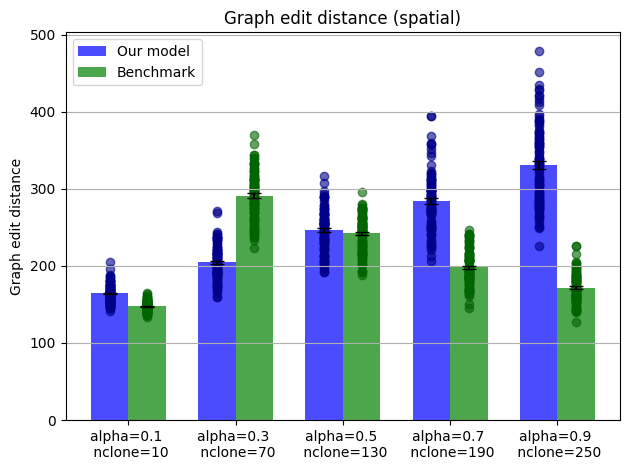

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# # Assuming you have two sets of matrix data, each of size (10, 100)
# np.random.seed(0)  # For reproducibility
# matrix_group1 = np.random.rand(10, 100)
# matrix_group2 = np.random.rand(10, 100)

# # Select elements at positions 2, 4, 6, 8, 10 from each row (indices 1, 3, 5, 7, 9)
# selected_elements_group1 = matrix_group1[:, [1, 3, 5, 7, 9]]
# selected_elements_group2 = matrix_group2[:, [1, 3, 5, 7, 9]]
selected_elements_group1 = ged_spatial[[1,3,5,7,9],:]
selected_elements_group2 = ged_spatial_benchmark
# Calculate means and standard errors of the means (SEM) for each category in both groups
means_group1 = np.mean(selected_elements_group1, axis=1)
sems_group1 = np.std(selected_elements_group1, axis=1) / np.sqrt(selected_elements_group1.shape[1])

means_group2 = np.mean(selected_elements_group2, axis=1)
sems_group2 = np.std(selected_elements_group2, axis=1) / np.sqrt(selected_elements_group2.shape[1])

# Plotting
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
categories = ['alpha=0.1 \n nclone=10', 
              'alpha=0.3 \n nclone=70', 
              'alpha=0.5 \n nclone=130', 
              'alpha=0.7 \n nclone=190', 
              'alpha=0.9 \n nclone=250']
x = np.arange(len(categories))  # X positions for the groups

fig, ax = plt.subplots()
width = 0.35  # Width of the bars

# Group 1
rects1 = ax.bar(x - width/2, means_group1, width, yerr=sems_group1, label='Our model', capsize=5, color='blue', alpha=0.7)
# Overlay individual points for Group 1
for idx, xpos in enumerate(x - width/2):
    ax.scatter([xpos] * selected_elements_group1.shape[1], selected_elements_group1[idx, :], color='darkblue', alpha=0.6)

# Group 2
rects2 = ax.bar(x + width/2, means_group2, width, yerr=sems_group2, label='Benchmark', capsize=5, color='green', alpha=0.7)
# Overlay individual points for Group 2
for idx, xpos in enumerate(x + width/2):
    ax.scatter([xpos] * selected_elements_group2.shape[1], selected_elements_group2[idx, :], color='darkgreen', alpha=0.6)

ax.set_ylabel('Graph edit distance')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_title('Graph edit distance (spatial)')
ax.yaxis.grid(True)
ax.legend()

plt.tight_layout()

plt.savefig('ged_spatial.png')
plt.show()


In [22]:
nodes_spatial = np.genfromtxt('spatial_results.csv', delimiter=',', skip_header=1)
nodes_spatial_PE = np.genfromtxt('spatial_results_PE.csv', delimiter=',', skip_header=1)
nodes_spatial_benchmark = np.genfromtxt('spatial_results_benchmark.csv', delimiter=',', skip_header=1)

In [38]:
np.shape(nodes_spatial_benchmark)

(100, 5)

In [37]:
np.shape(nodes_spatial[:,[1,3,5,7,9]])

(100, 5)

In [40]:
np.mean(selected_elements_group1, axis=1)

array([35.8, 30. , 28.2, 40.6, 34.8, 42. , 36.4, 36.8, 26.8, 41.2, 36.4,
       35. , 39.4, 35. , 35.2, 34.8, 36. , 32.6, 36.2, 28.8, 31.8, 36.2,
       31.4, 37.8, 38. , 40.6, 34.8, 38.2, 41.4, 38.2, 35.4, 37.6, 32. ,
       40.6, 43.4, 32.4, 34.4, 35.2, 35. , 30.8, 29.4, 28.4, 29.8, 33.8,
       36.8, 34.6, 34.4, 27.6, 32.2, 35.4, 31.2, 35.4, 42.6, 39.4, 40.6,
       39. , 36.4, 36.8, 41.8, 42. , 34.6, 37.8, 35. , 32.6, 44.6, 35.8,
       28.4, 35.6, 36.4, 29.8, 39.6, 36. , 37.4, 37.2, 31.8, 42.2, 33.4,
       41.4, 33. , 39.6, 33.2, 29.6, 30.2, 41.2, 31.8, 40. , 36.4, 34. ,
       41.8, 36.8, 37.4, 35.4, 36. , 37. , 31.2, 47. , 31.8, 30.6, 34.4,
       36.8])

In [12]:

# Increase font sizes
xlabel_size = 20
ylabel_size = 20
title_size = 20
legend_size = 15
tick_label_size = 15


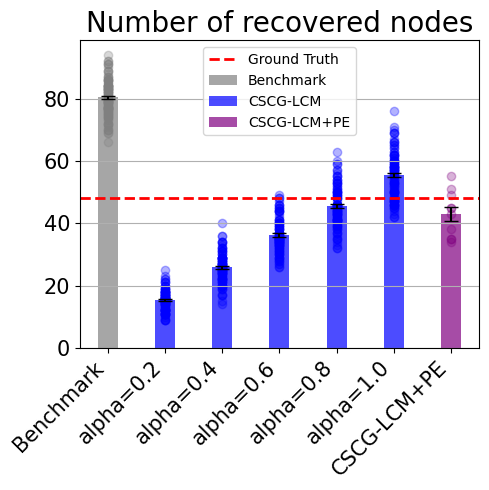

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# # Assuming you have two sets of matrix data, each of size (10, 100)
# np.random.seed(0)  # For reproducibility
# matrix_group1 = np.random.rand(10, 100)
# matrix_group2 = np.random.rand(10, 100)

# # Select elements at positions 2, 4, 6, 8, 10 from each row (indices 1, 3, 5, 7, 9)
# selected_elements_group1 = matrix_group1[:, [1, 3, 5, 7, 9]]
# selected_elements_group2 = matrix_group2[:, [1, 3, 5, 7, 9]]
selected_elements_group1 = np.transpose(nodes_spatial[:,[1,3,5,7,9]])
selected_elements_group2 = np.transpose(nodes_spatial_benchmark)
selected_elements_group3 = np.transpose(nodes_spatial_PE)
# Calculate means and standard errors of the means (SEM) for each category in both groups
means_group1 = np.mean(selected_elements_group1, axis=1)
sems_group1 = np.std(selected_elements_group1, axis=1) / np.sqrt(selected_elements_group1.shape[1])

means_group2 = np.mean(selected_elements_group2, axis=1)
sems_group2 = np.std(selected_elements_group2, axis=1) / np.sqrt(selected_elements_group2.shape[1])

means_group3 = np.mean(selected_elements_group3)
sems_group3 = np.std(selected_elements_group3) / np.sqrt(selected_elements_group3.shape[0])


# Selecting one specific bar from the second group as a reference (e.g., the mean of the first category)
ref_mean = np.mean(selected_elements_group2[1, :])  # Assume we select the first category as the reference
ref_sem = np.std(selected_elements_group2[1, :]) / np.sqrt(selected_elements_group2.shape[1])

# Plotting setup
# categories = ['Reference', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
categories = ['Benchmark',
                'alpha=0.2', 
              'alpha=0.4', 
              'alpha=0.6', 
              'alpha=0.8', 
              'alpha=1.0', 
             'CSCG-LCM+PE']
x = np.arange(len(categories))  # X positions for all bars including the reference

fig, ax = plt.subplots(figsize=(5,5))
width = 0.35  # Width of the bars

# # Plotting the reference bar separately
# ax.bar(x[0], ref_mean, width, yerr=ref_sem, label='Benchmark', capsize=5, color='gray', alpha=0.7)

# Plotting the reference bar separately
ref_bar = ax.bar(x[0], ref_mean, width, yerr=ref_sem, label='Benchmark', capsize=5, color='gray', alpha=0.7)
# Overlay individual points for the reference bar
ax.scatter([x[0]] * selected_elements_group2.shape[1], selected_elements_group2[1, :], color='gray', alpha=0.3)


# Plotting bars for Group 1
rects1 = ax.bar(x[1:6], means_group1, width, yerr=sems_group1, label='CSCG-LCM', capsize=5, color='blue', alpha=0.7)
# Overlay individual points for Group 1
for idx, xpos in enumerate(x[1:6]):
    ax.scatter([xpos] * selected_elements_group1.shape[1], selected_elements_group1[idx, :], color='blue', alpha=0.3)

    
rects1 = ax.bar(x[-1], means_group3, width, yerr=sems_group3, label='CSCG-LCM+PE', capsize=5, color='purple', alpha=0.7)
ax.scatter([x[-1]] * selected_elements_group3.shape[0], selected_elements_group3[:], color='purple', alpha=0.3)

# General settings
# ax.set_ylabel('Values')
# ax.set_xticks(x)
# ax.set_xticklabels(categories)
# ax.set_title('Comparison of Five Categories with a Reference Bar')
# ax.yaxis.grid(True)
# ax.legend()

gt_value = 48
ax.axhline(y=gt_value, color='red', linestyle='--', linewidth=2, label='Ground Truth')


# plt.tight_layout()
# plt.show()

# # Plotting
# categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']

# x = np.arange(len(categories))  # X positions for the groups

# fig, ax = plt.subplots()
# width = 0.35  # Width of the bars

# # Group 1
# rects1 = ax.bar(x - width/2, means_group1, width, yerr=sems_group1, label='Our model', capsize=5, color='blue', alpha=0.7)
# # Overlay individual points for Group 1
# for idx, xpos in enumerate(x - width/2):
#     ax.scatter([xpos] * selected_elements_group1.shape[1], selected_elements_group1[idx, :], color='darkblue', alpha=0.6)

# # Group 2
# rects2 = ax.bar(x + width/2, means_group2, width, yerr=sems_group2, label='Benchmark', capsize=5, color='green', alpha=0.7)
# # Overlay individual points for Group 2
# for idx, xpos in enumerate(x + width/2):
#     ax.scatter([xpos] * selected_elements_group2.shape[1], selected_elements_group2[idx, :], color='darkgreen', alpha=0.6)


# Adjust the x-tick label size if necessary for space
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=tick_label_size)

# ax.set_ylabel('Number of recovered nodes', fontsize=ylabel_size)
ax.set_xticks(x)
ax.set_xticklabels(categories)
# Set the font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax.set_title('Number of recovered nodes', fontsize=title_size)
ax.yaxis.grid(True)
ax.legend()

plt.tight_layout()

plt.savefig('node_spatial_2.png')
plt.show()


In [17]:
selected_elements_group1 = ged_spatial[[1,3,5,7,9],:]
selected_elements_group2 = ged_spatial_benchmark

In [22]:
normalized_ged_spatial = np.mean(selected_elements_group1, axis=1)
normalized_ged_spatial / means_group1

array([10.68249837,  7.89810884,  6.79569892,  6.24884488,  5.95349676])

In [24]:
normalized_ged_spatial_benchmark = np.mean(selected_elements_group2, axis=1)
normalized_ged_spatial_benchmark / means_group2

array([3.7776642 , 3.62254292, 3.4152913 , 3.17615002, 2.9814107 ])

In [23]:
np.mean(selected_elements_group2, axis=1)

array([147.82, 291.18, 242.11, 198.16, 171.61])

In [11]:
means_group1

array([15.37, 25.91, 36.27, 45.45, 55.48])

In [12]:
means_group2

array([39.13, 80.38, 70.89, 62.39, 57.56])

In [16]:
np.mean(ged_spatial,axis=1)

array([150.93, 164.19, 179.  , 204.64, 229.03, 246.48, 220.  , 284.01,
       307.69, 330.3 ])

In [25]:
node_means_group1 = means_group1
node_means_group2 = means_group2

In [124]:
from scipy.stats import ttest_ind

In [128]:
print(ttest_ind(ged_spatial[1,:], ged_spatial_benchmark[1], alternative='less'))
print(ttest_ind(ged_spatial[3,:], ged_spatial_benchmark[1], alternative='less'))
print(ttest_ind(ged_spatial[5,:], ged_spatial_benchmark[1], alternative='less'))
print(ttest_ind(ged_spatial[7,:], ged_spatial_benchmark[1], alternative='less'))
print(ttest_ind(ged_spatial[9,:], ged_spatial_benchmark[1], alternative='less'))

TtestResult(statistic=-38.41610509795253, pvalue=5.039078135149622e-94, df=198.0)
TtestResult(statistic=-22.581955355627347, pvalue=5.52519163415906e-57, df=198.0)
TtestResult(statistic=-10.835622894275259, pvalue=4.406661497356357e-22, df=198.0)
TtestResult(statistic=-1.4713945492495717, pvalue=0.07138599273849079, df=198.0)
TtestResult(statistic=6.415651358729895, pvalue=0.9999999994943742, df=198.0)


In [129]:
np.shape(nodes_spatial)

(100, 10)

In [131]:
print(ttest_ind(nodes_spatial[:,1], nodes_spatial_benchmark[1]))
print(ttest_ind(nodes_spatial[:,3], nodes_spatial_benchmark[1]))
print(ttest_ind(nodes_spatial[:,5], nodes_spatial_benchmark[1]))
print(ttest_ind(nodes_spatial[:,7], nodes_spatial_benchmark[1]))
print(ttest_ind(nodes_spatial[:,9], nodes_spatial_benchmark[1]))

TtestResult(statistic=-21.658995303924083, pvalue=3.86817086868101e-40, df=103.0)
TtestResult(statistic=-14.117471465687162, pvalue=7.964338784619623e-26, df=103.0)
TtestResult(statistic=-9.59754055529666, pvalue=5.812220378186928e-16, df=103.0)
TtestResult(statistic=-5.709179026567683, pvalue=1.1025659937402698e-07, df=103.0)
TtestResult(statistic=-2.5907910450231335, pvalue=0.010963469728111087, df=103.0)


In [144]:
gt = 48
for alpha in [1,3,5,7,9]:
    our = np.abs([x - gt for x in nodes_spatial[:,alpha]])
    bench =  np.abs([x - gt for x in nodes_spatial_benchmark[:,1]])
    print('alpha: {}'.format(alpha))
    print(ttest_ind(our, bench))
    print(np.mean(our), np.mean(bench))

# data = [10, 20, 30, 40, 50]
# value_to_subtract = 5
# new_data = [x - value_to_subtract for x in data]

alpha: 1
TtestResult(statistic=0.36800456451010266, pvalue=0.713262939143759, df=198.0)
32.63 32.38
alpha: 3
TtestResult(statistic=-13.476565183928297, pvalue=8.420918913800706e-30, df=198.0)
22.09 32.38
alpha: 5
TtestResult(statistic=-25.693772702849476, pvalue=5.69463066082425e-65, df=198.0)
11.75 32.38
alpha: 7
TtestResult(statistic=-37.188001203151835, pvalue=2.8762916898750386e-91, df=198.0)
5.89 32.38
alpha: 9
TtestResult(statistic=-27.828475742017016, pvalue=2.3663771504798342e-70, df=198.0)
8.46 32.38


In [141]:
bench

array([ 8., 43., 28., 15.,  8.])

In [142]:
our

array([ 7.,  0.,  0., 10.,  5., 22., 14.,  9.,  2., 19.,  2., 10., 11.,
        2.,  5., 13.,  8.,  6.,  8.,  6.,  3.,  5.,  1., 15., 14.,  5.,
        3., 12., 14., 15.,  6., 23.,  2., 18., 14.,  2.,  0.,  5.,  2.,
        1.,  2.,  1.,  4., 10.,  9.,  3.,  9.,  5.,  3., 12.,  2., 18.,
        8., 17., 21., 12., 10.,  7., 21., 18.,  4., 21.,  9.,  2., 16.,
       10.,  1.,  4., 11.,  1., 12., 11., 12., 11., 10., 16.,  1., 13.,
        6.,  9.,  2.,  1.,  2., 10., 10., 12.,  8.,  2., 14.,  4.,  9.,
        2.,  9., 17.,  6., 28.,  1.,  7.,  3.,  8.])

In [143]:
np.shape(nodes_spatial_benchmark)

(100, 5)

In [130]:
print(ttest_ind(nodes_spatial[:,1], nodes_spatial_benchmark[1], alternative='less'))
print(ttest_ind(nodes_spatial[:,3], nodes_spatial_benchmark[1], alternative='less'))
print(ttest_ind(nodes_spatial[:,5], nodes_spatial_benchmark[1], alternative='less'))
print(ttest_ind(nodes_spatial[:,7], nodes_spatial_benchmark[1], alternative='less'))
print(ttest_ind(nodes_spatial[:,9], nodes_spatial_benchmark[1], alternative='less'))

TtestResult(statistic=-21.658995303924083, pvalue=1.934085434340505e-40, df=103.0)
TtestResult(statistic=-14.117471465687162, pvalue=3.9821693923098116e-26, df=103.0)
TtestResult(statistic=-9.59754055529666, pvalue=2.906110189093464e-16, df=103.0)
TtestResult(statistic=-5.709179026567683, pvalue=5.512829968701349e-08, df=103.0)
TtestResult(statistic=-2.5907910450231335, pvalue=0.0054817348640555435, df=103.0)


In [134]:
from scipy import stats

print(stats.ttest_1samp(nodes_spatial[:,1], 280, alternative='less'))
print(stats.ttest_1samp(nodes_spatial[:,3], 280, alternative='less'))
print(stats.ttest_1samp(nodes_spatial[:,5], 280, alternative='less'))
print(stats.ttest_1samp(nodes_spatial[:,7], 280, alternative='less'))
print(stats.ttest_1samp(nodes_spatial[:,9], 280, alternative='less'))

TtestResult(statistic=-797.7759298610906, pvalue=1.2485770689463154e-190, df=99)
TtestResult(statistic=-528.0558566982597, pvalue=6.808882590210294e-173, df=99)
TtestResult(statistic=-446.5158971412054, pvalue=1.1003124309933158e-165, df=99)
TtestResult(statistic=-353.3237823918923, pvalue=1.2587832467683744e-155, df=99)
TtestResult(statistic=-304.0871240457344, pvalue=3.5184951665164644e-149, df=99)


In [135]:
print(stats.ttest_1samp(nodes_spatial[:,1], 280))
print(stats.ttest_1samp(nodes_spatial[:,3], 280))
print(stats.ttest_1samp(nodes_spatial[:,5], 280))
print(stats.ttest_1samp(nodes_spatial[:,7], 280))
print(stats.ttest_1samp(nodes_spatial[:,9], 280))

TtestResult(statistic=-797.7759298610906, pvalue=2.497154137892631e-190, df=99)
TtestResult(statistic=-528.0558566982597, pvalue=1.3617765180420588e-172, df=99)
TtestResult(statistic=-446.5158971412054, pvalue=2.2006248619866315e-165, df=99)
TtestResult(statistic=-353.3237823918923, pvalue=2.517566493536749e-155, df=99)
TtestResult(statistic=-304.0871240457344, pvalue=7.036990333032929e-149, df=99)


In [132]:
48 - [1,2,3,4,5]

TypeError: unsupported operand type(s) for -: 'int' and 'list'

In [127]:
print(np.mean(ged_spatial[1,:]), np.mean(ged_spatial[3,:]) , np.mean(ged_spatial[5,:]), np.mean(ged_spatial[7,:]), np.mean(ged_spatial[9,:]))
print(np.mean(ged_spatial_benchmark[1]))

164.19 204.64 246.48 284.01 330.3
291.18


In [28]:
np.shape(selected_elements_group1)

(5, 100)

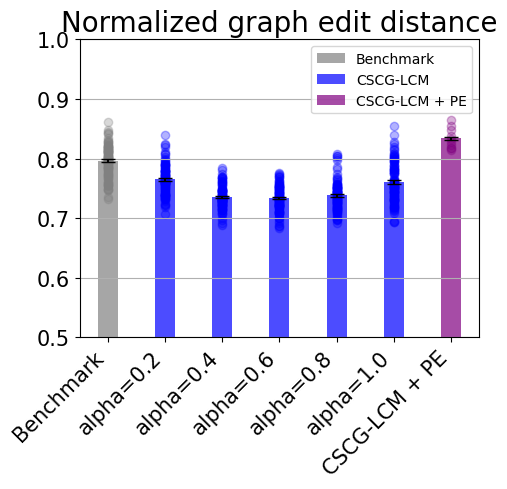

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# # Assuming you have two sets of matrix data, each of size (10, 100)
# np.random.seed(0)  # For reproducibility
# matrix_group1 = np.random.rand(10, 100)
# matrix_group2 = np.random.rand(10, 100)

# # Select elements at positions 2, 4, 6, 8, 10 from each row (indices 1, 3, 5, 7, 9)
# selected_elements_group1 = matrix_group1[:, [1, 3, 5, 7, 9]]
# selected_elements_group2 = matrix_group2[:, [1, 3, 5, 7, 9]]

# selected_elements_group1 = ged_norm_spatial[[1,3,5,7,9],:] #/ node_means_group1
spatial_indices = [1,3,5,7,9]
selected_elements_group1 = []
# means
for s in spatial_indices: 
    selected_elements_group1.append(ged_norm_spatial[s])

# for i in range(len(selected_elements_group1)): 
#     selected_elements_group1[i, :] # /= means_group1[i]
selected_elements_group2 = ged_norm_spatial_benchmark[1] #/ node_means_group2
# for i in range(len(selected_elements_group2)): 
#     selected_elements_group2[i, :] /= means_group2[i]

# for i in range(len(selected_elements_group3)): 
#     selected_elements_group3[i] /= nodes_spatial_PE[i]
selected_elements_group3 = ged_norm_spatial_PE
# Calculate means and standard errors of the means (SEM) for each category in both groups
means_group1 = np.mean(selected_elements_group1, axis=1) #/ node_means_group1
sems_group1 = np.std(selected_elements_group1, axis=1) / np.sqrt(np.shape(selected_elements_group1)[1])

means_group2 = np.mean(selected_elements_group2) #/ node_means_group2
sems_group2 = np.std(selected_elements_group2) / np.sqrt(selected_elements_group2.shape)


means_group3 = np.mean(selected_elements_group3) #/ node_means_group2
sems_group3 = np.std(selected_elements_group3) / np.sqrt(selected_elements_group3.shape[0])

# Selecting one specific bar from the second group as a reference (e.g., the mean of the first category)
ref_mean = np.mean(selected_elements_group2)  # Assume we select the first category as the reference
ref_sem = np.std(selected_elements_group2) / np.sqrt(selected_elements_group2.shape)

# Plotting setup
# categories = ['Reference', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
categories = ['Benchmark',
                'alpha=0.2', 
              'alpha=0.4', 
              'alpha=0.6', 
              'alpha=0.8', 
              'alpha=1.0', 
             'CSCG-LCM + PE']
x = np.arange(len(categories))  # X positions for all bars including the reference

fig, ax = plt.subplots(figsize=(5,5))
width = 0.35  # Width of the bars

# # Plotting the reference bar separately
# ax.bar(x[0], ref_mean, width, yerr=ref_sem, label='Benchmark', capsize=5, color='gray', alpha=0.7)

# Plotting the reference bar separately
ref_bar = ax.bar(x[0], ref_mean, width, yerr=ref_sem, label='Benchmark', capsize=5, color='gray', alpha=0.7)
# Overlay individual points for the reference bar
ax.scatter([x[0]] * selected_elements_group2.shape[0], selected_elements_group2, color='gray', alpha=0.3)


# Plotting bars for Group 1
rects1 = ax.bar(x[1:6], means_group1, width, yerr=sems_group1, label='CSCG-LCM', capsize=5, color='blue', alpha=0.7)
# Overlay individual points for Group 1
for idx, xpos in enumerate(x[1:6]):
    ax.scatter([xpos] * np.shape(selected_elements_group1)[1], selected_elements_group1[idx], color='blue', alpha=0.3)
# rects1 = ax.bar(x[1:6], means_group1, width, yerr=sems_group1, label='Proposed model', capsize=5, color='blue', alpha=0.7)
# # Overlay individual points for Group 1
# for idx, xpos in enumerate(x[1:6]):
#     ax.scatter([xpos] * selected_elements_group1.shape[1], selected_elements_group1[idx, :], color='blue', alpha=0.3)

    
    
    
# Plotting bars for PE model
rects2 = ax.bar(x[-1], means_group3, width, yerr=ref_sem, label='CSCG-LCM + PE', capsize=5, color='purple', alpha=0.7)
# Overlay individual points for the reference bar
ax.scatter([x[-1]] * np.shape(selected_elements_group3)[0], selected_elements_group3[:], color='purple', alpha=0.3)    
# General settings
# ax.set_ylabel('Values')
# ax.set_xticks(x)
# ax.set_xticklabels(categories)
# ax.set_title('Comparison of Five Categories with a Reference Bar')
# ax.yaxis.grid(True)
# ax.legend()

# gt_value = 48
# ax.axhline(y=gt_value, color='red', linestyle='--', linewidth=2, label='Ground Truth')


# plt.tight_layout()
# plt.show()

# # Plotting
# categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']

# x = np.arange(len(categories))  # X positions for the groups

# fig, ax = plt.subplots()
# width = 0.35  # Width of the bars

# # Group 1
# rects1 = ax.bar(x - width/2, means_group1, width, yerr=sems_group1, label='Our model', capsize=5, color='blue', alpha=0.7)
# # Overlay individual points for Group 1
# for idx, xpos in enumerate(x - width/2):
#     ax.scatter([xpos] * selected_elements_group1.shape[1], selected_elements_group1[idx, :], color='darkblue', alpha=0.6)

# # Group 2
# rects2 = ax.bar(x + width/2, means_group2, width, yerr=sems_group2, label='Benchmark', capsize=5, color='green', alpha=0.7)
# # Overlay individual points for Group 2
# for idx, xpos in enumerate(x + width/2):
#     ax.scatter([xpos] * selected_elements_group2.shape[1], selected_elements_group2[idx, :], color='darkgreen', alpha=0.6)


# Adjust the x-tick label size if necessary for space
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=tick_label_size)

# ax.set_ylabel('Graph edit distance', fontsize=ylabel_size)
ax.set_xticks(x)
ax.set_xticklabels(categories)
# Set the font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax.set_title('Normalized graph edit distance', fontsize=title_size)
ax.yaxis.grid(True)
# Set y-axis range
ax.set_ylim(0.5, 1)
ax.legend()

plt.tight_layout()

plt.savefig('ged_spatial.png')
plt.show()


In [90]:
from scipy.stats import ttest_ind

In [93]:
print(ttest_ind(selected_elements_group1[0], selected_elements_group2))
print(ttest_ind(selected_elements_group1[1], selected_elements_group2))
print(ttest_ind(selected_elements_group1[2], selected_elements_group2))
print(ttest_ind(selected_elements_group1[3], selected_elements_group2))
print(ttest_ind(selected_elements_group1[4], selected_elements_group2))

TtestResult(statistic=-8.482878703779543, pvalue=5.0782551064150326e-15, df=198.0)
TtestResult(statistic=-18.768706990296597, pvalue=7.979668357378261e-46, df=198.0)
TtestResult(statistic=-18.727630644024117, pvalue=1.053989681899619e-45, df=198.0)
TtestResult(statistic=-16.211474643668033, pvalue=3.584143836078541e-38, df=198.0)
TtestResult(statistic=-8.23645260868069, pvalue=2.377294368702888e-14, df=198.0)


In [94]:
print(ttest_ind(selected_elements_group2, selected_elements_group3))


TtestResult(statistic=-4.381440827415268, pvalue=2.7417646059364554e-05, df=108.0)


In [95]:
print(ttest_ind(selected_elements_group1[0], selected_elements_group3))
print(ttest_ind(selected_elements_group1[1], selected_elements_group3))
print(ttest_ind(selected_elements_group1[2], selected_elements_group3))
print(ttest_ind(selected_elements_group1[3], selected_elements_group3))
print(ttest_ind(selected_elements_group1[4], selected_elements_group3))

TtestResult(statistic=-8.299246411631133, pvalue=3.2628450185478624e-13, df=108.0)
TtestResult(statistic=-15.76339854241067, pvalue=9.027469753813355e-30, df=108.0)
TtestResult(statistic=-14.699087329703502, pvalue=1.5891897671862748e-27, df=108.0)
TtestResult(statistic=-12.048474009868524, pvalue=1.0546801107353743e-21, df=108.0)
TtestResult(statistic=-6.643225479442717, pvalue=1.2843211703186442e-09, df=108.0)


In [86]:
[xpos] * np.shape(selected_elements_group1)[0]

[0, 0, 0, 0, 0]

In [87]:
x

array([0, 1, 2, 3, 4, 5, 6])

In [82]:
selected_elements_group1[idx]

[0.7592592592592593,
 0.7616580310880829,
 0.7905759162303665,
 0.7614678899082569,
 0.7711442786069652,
 0.734375,
 0.7733990147783252,
 0.7777777777777778,
 0.797979797979798,
 0.7699115044247787,
 0.755656108597285,
 0.7630331753554502,
 0.7244094488188977,
 0.7405857740585774,
 0.7345132743362832,
 0.7916666666666666,
 0.7788461538461539,
 0.78,
 0.7596153846153846,
 0.8390804597701149,
 0.7810945273631841,
 0.7435897435897436,
 0.7688442211055276,
 0.7716535433070866,
 0.7663551401869159,
 0.7709251101321586,
 0.7614678899082569,
 0.7402597402597403,
 0.7788944723618091,
 0.7711442786069652,
 0.7938144329896907,
 0.798941798941799,
 0.755656108597285,
 0.7920792079207921,
 0.7327935222672065,
 0.7222222222222222,
 0.7824267782426778,
 0.7787610619469026,
 0.7547169811320755,
 0.7889447236180904,
 0.7846153846153846,
 0.7959183673469388,
 0.8111111111111111,
 0.75,
 0.7630331753554502,
 0.7314814814814815,
 0.7889447236180904,
 0.7735849056603774,
 0.7068965517241379,
 0.7489177489

In [71]:
np.shape(selected_elements_group1[idx])

(100,)

In [68]:
np.shape(selected_elements_group1)[0]

5

In [59]:
selected_elements_group2

array([0.7971831 , 0.82125604, 0.79369628, 0.79614325, 0.81141439,
       0.78571429, 0.83033419, 0.79096045, 0.80361757, 0.78666667,
       0.80104712, 0.81420765, 0.86057692, 0.80053908, 0.81661891,
       0.75522388, 0.74846626, 0.79310345, 0.75548589, 0.79069767,
       0.81627297, 0.78362573, 0.808     , 0.79603399, 0.73214286,
       0.81372549, 0.80371353, 0.77177177, 0.81917808, 0.84168865,
       0.81432361, 0.80310881, 0.82188295, 0.79726027, 0.81818182,
       0.77777778, 0.78306878, 0.77192982, 0.76854599, 0.77839335,
       0.80609418, 0.78350515, 0.7672956 , 0.78056426, 0.81717452,
       0.81725888, 0.76109215, 0.75792507, 0.82178218, 0.75438596,
       0.73501577, 0.74763407, 0.80319149, 0.83113456, 0.79539642,
       0.82843137, 0.83375315, 0.81298701, 0.81917808, 0.82749326,
       0.81058496, 0.80751174, 0.84313725, 0.78488372, 0.77177177,
       0.81067961, 0.8121547 , 0.81025641, 0.8045977 , 0.84732824,
       0.75609756, 0.79768786, 0.8005698 , 0.7989418 , 0.75925

In [48]:
ged_norm_spatial[1]

[0.7592592592592593,
 0.7616580310880829,
 0.7905759162303665,
 0.7614678899082569,
 0.7711442786069652,
 0.734375,
 0.7733990147783252,
 0.7777777777777778,
 0.797979797979798,
 0.7699115044247787,
 0.755656108597285,
 0.7630331753554502,
 0.7244094488188977,
 0.7405857740585774,
 0.7345132743362832,
 0.7916666666666666,
 0.7788461538461539,
 0.78,
 0.7596153846153846,
 0.8390804597701149,
 0.7810945273631841,
 0.7435897435897436,
 0.7688442211055276,
 0.7716535433070866,
 0.7663551401869159,
 0.7709251101321586,
 0.7614678899082569,
 0.7402597402597403,
 0.7788944723618091,
 0.7711442786069652,
 0.7938144329896907,
 0.798941798941799,
 0.755656108597285,
 0.7920792079207921,
 0.7327935222672065,
 0.7222222222222222,
 0.7824267782426778,
 0.7787610619469026,
 0.7547169811320755,
 0.7889447236180904,
 0.7846153846153846,
 0.7959183673469388,
 0.8111111111111111,
 0.75,
 0.7630331753554502,
 0.7314814814814815,
 0.7889447236180904,
 0.7735849056603774,
 0.7068965517241379,
 0.7489177489

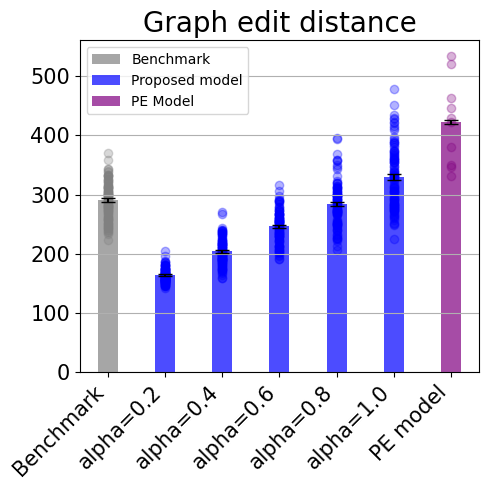

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# # Assuming you have two sets of matrix data, each of size (10, 100)
# np.random.seed(0)  # For reproducibility
# matrix_group1 = np.random.rand(10, 100)
# matrix_group2 = np.random.rand(10, 100)

# # Select elements at positions 2, 4, 6, 8, 10 from each row (indices 1, 3, 5, 7, 9)
# selected_elements_group1 = matrix_group1[:, [1, 3, 5, 7, 9]]
# selected_elements_group2 = matrix_group2[:, [1, 3, 5, 7, 9]]

selected_elements_group1 = ged_spatial[[1,3,5,7,9],:] #/ node_means_group1
# for i in range(len(selected_elements_group1)): 
#     selected_elements_group1[i, :] /= node_means_group1[i]
selected_elements_group2 = ged_spatial_benchmark # / node_means_group2
selected_elements_group3 = ged_spatial_PE
# for i in range(len(selected_elements_group2)): 
#     selected_elements_group2[i, :] /= node_means_group2[i]



# Calculate means and standard errors of the means (SEM) for each category in both groups
means_group1 = np.mean(selected_elements_group1, axis=1) #/ node_means_group1
sems_group1 = np.std(selected_elements_group1, axis=1) / np.sqrt(selected_elements_group1.shape[1])

means_group2 = np.mean(selected_elements_group2, axis=1) #/ node_means_group2
sems_group2 = np.std(selected_elements_group2, axis=1) / np.sqrt(selected_elements_group2.shape[1])

means_group3 = np.mean(selected_elements_group3) #/ node_means_group2
sems_group3 = np.std(selected_elements_group3) / np.sqrt(selected_elements_group3.shape[0])


# Selecting one specific bar from the second group as a reference (e.g., the mean of the first category)
ref_mean = np.mean(selected_elements_group2[1, :])  # Assume we select the first category as the reference
ref_sem = np.std(selected_elements_group2[1, :]) / np.sqrt(selected_elements_group2.shape[1])

# Plotting setup
# categories = ['Reference', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
categories = ['Benchmark',
                'alpha=0.2', 
              'alpha=0.4', 
              'alpha=0.6', 
              'alpha=0.8', 
              'alpha=1.0', 
             'PE model']
x = np.arange(len(categories))  # X positions for all bars including the reference

fig, ax = plt.subplots(figsize=(5,5))
width = 0.35  # Width of the bars

# # Plotting the reference bar separately
# ax.bar(x[0], ref_mean, width, yerr=ref_sem, label='Benchmark', capsize=5, color='gray', alpha=0.7)

# Plotting the reference bar separately
ref_bar = ax.bar(x[0], ref_mean, width, yerr=ref_sem, label='Benchmark', capsize=5, color='gray', alpha=0.7)
# Overlay individual points for the reference bar
ax.scatter([x[0]] * selected_elements_group2.shape[1], selected_elements_group2[1, :], color='gray', alpha=0.3)


# Plotting bars for Group 1
rects1 = ax.bar(x[1:6], means_group1, width, yerr=sems_group1, label='Proposed model', capsize=5, color='blue', alpha=0.7)
# Overlay individual points for Group 1
for idx, xpos in enumerate(x[1:6]):
    ax.scatter([xpos] * selected_elements_group1.shape[1], selected_elements_group1[idx, :], color='blue', alpha=0.3)

    
# Plotting bars for PE model
rects2 = ax.bar(x[-1], means_group3, width, yerr=ref_sem, label='PE Model', capsize=5, color='purple', alpha=0.7)
# Overlay individual points for the reference bar
ax.scatter([x[-1]] * selected_elements_group3.shape[0], selected_elements_group3[:], color='purple', alpha=0.3)

# General settings
# ax.set_ylabel('Values')
# ax.set_xticks(x)
# ax.set_xticklabels(categories)
# ax.set_title('Comparison of Five Categories with a Reference Bar')
# ax.yaxis.grid(True)
# ax.legend()

# gt_value = 48
# ax.axhline(y=gt_value, color='red', linestyle='--', linewidth=2, label='Ground Truth')


# plt.tight_layout()
# plt.show()

# # Plotting
# categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']

# x = np.arange(len(categories))  # X positions for the groups

# fig, ax = plt.subplots()
# width = 0.35  # Width of the bars

# # Group 1
# rects1 = ax.bar(x - width/2, means_group1, width, yerr=sems_group1, label='Our model', capsize=5, color='blue', alpha=0.7)
# # Overlay individual points for Group 1
# for idx, xpos in enumerate(x - width/2):
#     ax.scatter([xpos] * selected_elements_group1.shape[1], selected_elements_group1[idx, :], color='darkblue', alpha=0.6)

# # Group 2
# rects2 = ax.bar(x + width/2, means_group2, width, yerr=sems_group2, label='Benchmark', capsize=5, color='green', alpha=0.7)
# # Overlay individual points for Group 2
# for idx, xpos in enumerate(x + width/2):
#     ax.scatter([xpos] * selected_elements_group2.shape[1], selected_elements_group2[idx, :], color='darkgreen', alpha=0.6)


# Adjust the x-tick label size if necessary for space
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=tick_label_size)

# ax.set_ylabel('Graph edit distance', fontsize=ylabel_size)
ax.set_xticks(x)
ax.set_xticklabels(categories)
# Set the font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=tick_label_size)
ax.set_title('Graph edit distance', fontsize=title_size)
ax.yaxis.grid(True)
ax.legend()

plt.tight_layout()

plt.savefig('ged_spatial.png')
plt.show()


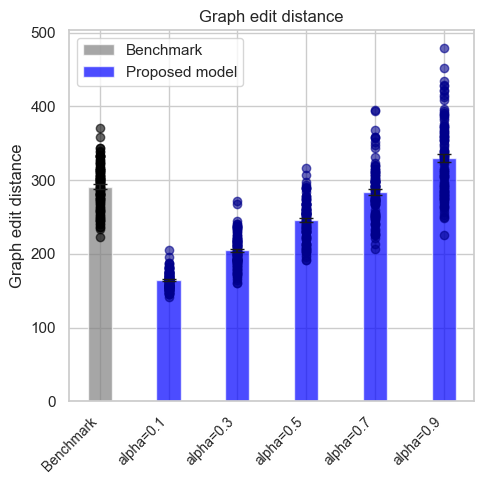

In [108]:
import numpy as np
import matplotlib.pyplot as plt

# # Assuming you have two sets of matrix data, each of size (10, 100)
# np.random.seed(0)  # For reproducibility
# matrix_group1 = np.random.rand(10, 100)
# matrix_group2 = np.random.rand(10, 100)

# # Select elements at positions 2, 4, 6, 8, 10 from each row (indices 1, 3, 5, 7, 9)
# selected_elements_group1 = matrix_group1[:, [1, 3, 5, 7, 9]]
# selected_elements_group2 = matrix_group2[:, [1, 3, 5, 7, 9]]
# selected_elements_group1 = np.transpose(nodes_spatial[:,[1,3,5,7,9]])
# selected_elements_group2 = np.transpose(nodes_spatial_benchmark)

selected_elements_group1 = ged_spatial[[1,3,5,7,9],:]
selected_elements_group2 = ged_spatial_benchmark


# Calculate means and standard errors of the means (SEM) for each category in both groups
means_group1 = np.mean(selected_elements_group1, axis=1)
sems_group1 = np.std(selected_elements_group1, axis=1) / np.sqrt(selected_elements_group1.shape[1])

means_group2 = np.mean(selected_elements_group2, axis=1)
sems_group2 = np.std(selected_elements_group2, axis=1) / np.sqrt(selected_elements_group2.shape[1])


# Selecting one specific bar from the second group as a reference (e.g., the mean of the first category)
ref_mean = np.mean(selected_elements_group2[1, :])  # Assume we select the first category as the reference
ref_sem = np.std(selected_elements_group2[1, :]) / np.sqrt(selected_elements_group2.shape[1])

# Plotting setup
# categories = ['Reference', 'Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']
categories = ['Benchmark',
                'alpha=0.1', 
              'alpha=0.3', 
              'alpha=0.5', 
              'alpha=0.7', 
              'alpha=0.9']
x = np.arange(len(categories))  # X positions for all bars including the reference

fig, ax = plt.subplots(figsize=(5,5))
width = 0.35  # Width of the bars

# # Plotting the reference bar separately
# ax.bar(x[0], ref_mean, width, yerr=ref_sem, label='Benchmark', capsize=5, color='gray', alpha=0.7)

# Plotting the reference bar separately
ref_bar = ax.bar(x[0], ref_mean, width, yerr=ref_sem, label='Benchmark', capsize=5, color='gray', alpha=0.7)
# Overlay individual points for the reference bar
ax.scatter([x[0]] * selected_elements_group2.shape[1], selected_elements_group2[1, :], color='black', alpha=0.6)


# Plotting bars for Group 1
rects1 = ax.bar(x[1:], means_group1, width, yerr=sems_group1, label='Proposed model', capsize=5, color='blue', alpha=0.7)
# Overlay individual points for Group 1
for idx, xpos in enumerate(x[1:]):
    ax.scatter([xpos] * selected_elements_group1.shape[1], selected_elements_group1[idx, :], color='darkblue', alpha=0.6)

# General settings
# ax.set_ylabel('Values')
# ax.set_xticks(x)
# ax.set_xticklabels(categories)
# ax.set_title('Comparison of Five Categories with a Reference Bar')
# ax.yaxis.grid(True)
# ax.legend()

# gt_value = 48
# ax.axhline(y=gt_value, color='red', linestyle='--', linewidth=2, label='Ground Truth')


# plt.tight_layout()
# plt.show()

# # Plotting
# categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4', 'Category 5']

# x = np.arange(len(categories))  # X positions for the groups

# fig, ax = plt.subplots()
# width = 0.35  # Width of the bars

# # Group 1
# rects1 = ax.bar(x - width/2, means_group1, width, yerr=sems_group1, label='Our model', capsize=5, color='blue', alpha=0.7)
# # Overlay individual points for Group 1
# for idx, xpos in enumerate(x - width/2):
#     ax.scatter([xpos] * selected_elements_group1.shape[1], selected_elements_group1[idx, :], color='darkblue', alpha=0.6)

# # Group 2
# rects2 = ax.bar(x + width/2, means_group2, width, yerr=sems_group2, label='Benchmark', capsize=5, color='green', alpha=0.7)
# # Overlay individual points for Group 2
# for idx, xpos in enumerate(x + width/2):
#     ax.scatter([xpos] * selected_elements_group2.shape[1], selected_elements_group2[idx, :], color='darkgreen', alpha=0.6)


# Adjust the x-tick label size if necessary for space
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

ax.set_ylabel('Graph edit distance')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_title('Graph edit distance')
ax.yaxis.grid(True)
ax.legend()

plt.tight_layout()

plt.savefig('ged_spatial.png')
plt.show()


In [68]:
states_spatial = pd.read_csv("spatial_results.csv")
states_modular = pd.read_csv("modular_results.csv")
states_lattice = pd.read_csv("lattice_results.csv")

np.shape(states_spatial)

(100, 10)

In [69]:
columns_to_select = [1,3,5,7,9]
states_spatial = states_spatial.iloc[:,columns_to_select]
np.shape(states_spatial)

(100, 5)

In [88]:
states_spatial = pd.read_csv("spatial_results.csv")
states_spatial = states_spatial.iloc[:,columns_to_select]
np.shape(states_spatial)

(100, 5)

In [89]:
np.tile([1,2,3,4,5],10)

array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2,
       3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4,
       5, 1, 2, 3, 4, 5])

In [94]:
a =np.repeat([0.2, 0.4, 0.6, 0.8, 1.0], 100)
a

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4,
       0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.

In [ ]:
np.repeat(a,3)

In [95]:
def vertical_concatenate(df):
    return pd.concat([df[row] for col in df], ignore_index=True)

In [98]:
aa = np.array([[1,2,3,4,5], [2,4,5,6,7]])
b = pd.DataFrame(aa)
c = vertical_concatenate(b)

In [100]:
concatenated_rows = b.stack().reset_index(drop=True)


In [101]:
concatenated_rows

0    1
1    2
2    3
3    4
4    5
5    2
6    4
7    5
8    6
9    7
dtype: int64

In [99]:
c

0    1
1    2
2    2
3    4
4    3
5    5
6    4
7    6
8    5
9    7
dtype: int64

/var/folders/0y/6z5lvyy15plflq56kf5szmhr0000gp/T/ipykernel_69815/1956627909.py:55: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-68.75       -54.16666667 -18.75         0.          14.58333333
 -75.         -58.33333333 -39.58333333 -14.58333333   0.
 -75.         -58.33333333 -45.83333333 -27.08333333   0.
 -64.58333333 -37.5         -8.33333333  12.5         20.83333333
 -72.91666667 -35.41666667 -29.16666667 -10.41666667  10.41666667
 -52.08333333 -35.41666667 -29.16666667   8.33333333  45.83333333
 -72.91666667 -39.58333333 -25.         -12.5         29.16666667
 -68.75       -47.91666667 -22.91666667   4.16666667  18.75
 -77.08333333 -64.58333333 -41.66666667 -33.33333333  -4.16666667
 -66.66666667 -39.58333333 -14.58333333  10.41666667  39.58333333
 -66.66666667 -45.83333333  -8.33333333  -4.16666667   4.16666667
 -68.75       -52.08333333 -31.25        -4.16666667  20.83333333
 -54.16666667 -43.

<Figure size 640x480 with 0 Axes>

<Figure size 600x400 with 0 Axes>

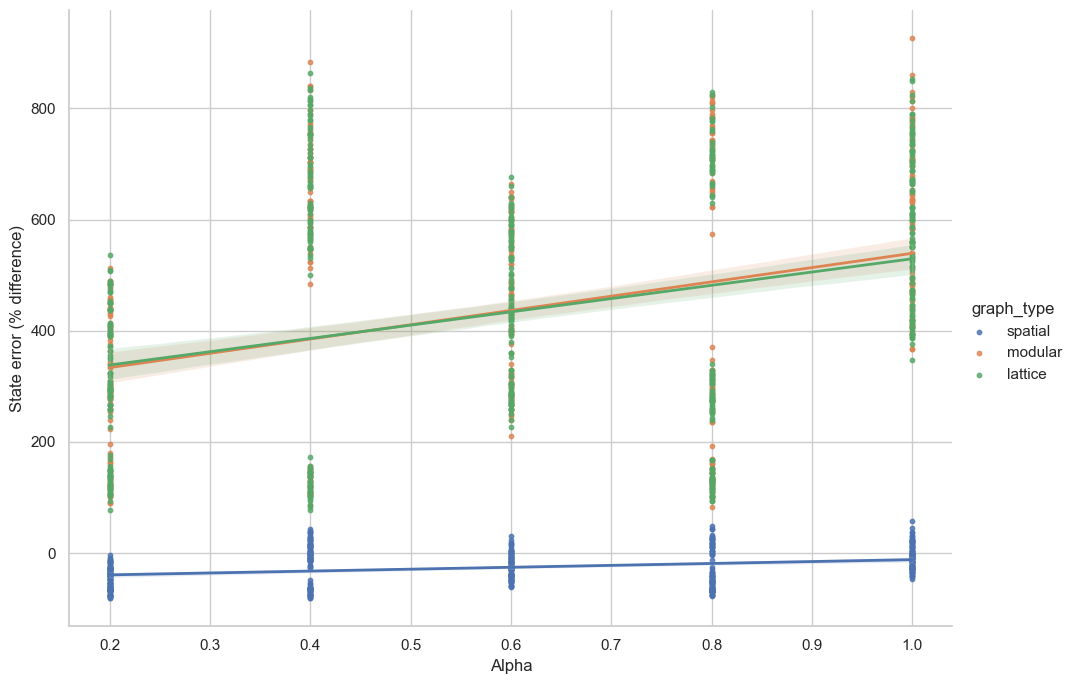

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_select = [1,3,5,7,9]

# Load the CSV files as pandas DataFrames
states_spatial = pd.read_csv("spatial_results.csv")
states_modular = pd.read_csv("modular_results.csv")
states_lattice = pd.read_csv("lattice_results.csv")

states_spatial = states_spatial.iloc[:,columns_to_select]
states_modular = states_modular.iloc[:,columns_to_select]
states_lattice = states_lattice.iloc[:,columns_to_select]

# states_spatial = states_spatial.T
# states_modular = states_modular.T
# staets_lattice = states_lattice.T

# Function to vertically concatenate DataFrame columns into a single Series
# def vertical_concatenate(df):
#     return pd.concat([df[col] for col in df], ignore_index=True)

# # Applying the function to each DataFrame
# states_spatial = vertical_concatenate(states_spatial)
# states_modular = vertical_concatenate(states_modular)
# states_lattice = vertical_concatenate(states_lattice)

states_spatial = states_spatial.stack().reset_index(drop=True)
states_modular = states_modular.stack().reset_index(drop=True)
states_lattice = states_lattice.stack().reset_index(drop=True)

# Combine all states into a single Series
states = pd.concat([states_spatial, states_modular, states_lattice], ignore_index=True)

# Create alpha Series
# alpha = np.tile(np.linspace(0.1, 1.0, num=10), 100)
alpha = [0.2, 0.4, 0.6, 0.8, 1.0]
alpha = np.tile(alpha, 100)
# alpha = np.repeat([0.2, 0.4, 0.6, 0.8, 1.0], 100)
alpha = np.repeat(alpha, 3)  # Repeat each alpha value 3 times

# Create graph_type Series
graph_type = np.repeat(['spatial', 'modular', 'lattice'], 500)

# Create DataFrame
df = pd.DataFrame({
    'states': states,
    'alpha': alpha,
    'graph_type': graph_type
})

# Adjust states values based on graph_type
df.loc[df['graph_type'] == 'spatial', 'states'] = ((df['states'] - 48) * 100) / 48
df.loc[df['graph_type'] == 'modular', 'states'] = ((df['states'] - 30) * 100) / 30
df.loc[df['graph_type'] == 'lattice', 'states'] = ((df['states'] - 30) * 100) / 30

# Set context to "talk" for more compact plotting, "paper" for even smaller elements
sns.set_context("talk", font_scale=0.8)  # Scales down font sizes
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the rect to fit the layout
# Plotting
plt.figure(figsize=(6,4))
sns.set_theme(style="whitegrid")
ax = sns.lmplot(x='alpha', y='states', hue='graph_type', data=df, height=7, aspect=1.4, markers='o', scatter_kws={"s": 10}, line_kws={"lw": 2})
ax.set_axis_labels("Alpha", "State error (% difference)")
# plt.title("State Error by Graph Type with Linear Regression")
plt.show()


In [82]:
alpha

array([0.2, 0.2, 0.2, ..., 1. , 1. , 1. ])

In [83]:
graph_type

array(['spatial', 'spatial', 'spatial', ..., 'lattice', 'lattice',
       'lattice'], dtype='<U7')

In [78]:
len(graph_type)

4500